Fractal dimension: 0.791


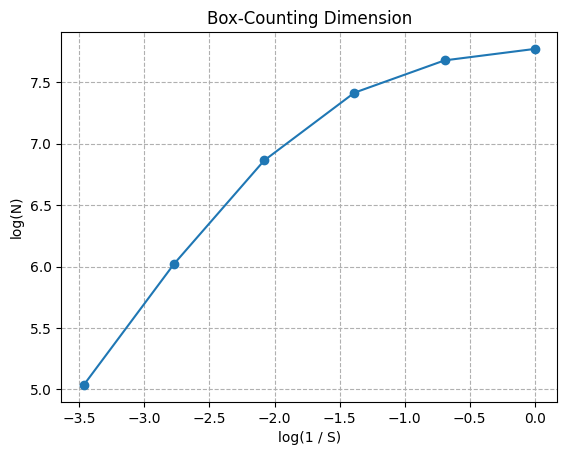

Lacunarity dimension: 0.956


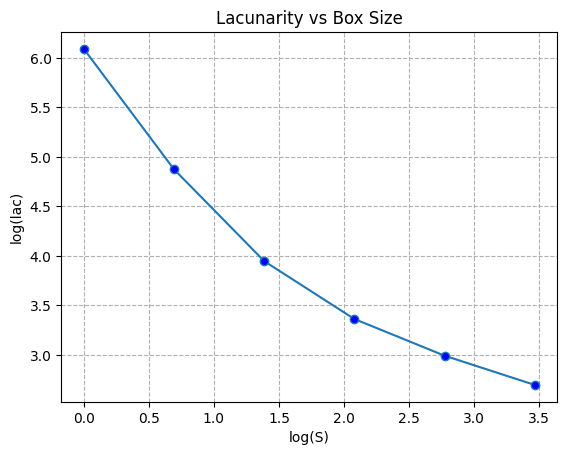

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.ndimage import uniform_filter


def box_count(grid, box_sizes):
    N = len(grid) # grid size
    counts = []
    
    #counts the number of occupied boxes for each size
    for size in box_sizes:
        count = 0
        for i in range(0,N,size):
            for j in range(0,N,size):
                if np.any(grid[i:i+size, j:j+size]):
                    count += 1
        counts.append(count)
    return counts

def lacunarity(grid, box_sizes):
    counts = []
    
    for r in box_sizes:
        local_sum = uniform_filter(grid.astype(float), size=r, mode='constant') * (r * r)
        values = local_sum.ravel()

        mean = np.mean(values)
        variance = np.var(values)
        
        lac = (variance / (mean**2))
        counts.append(lac)

    return counts

with open('figures\DATA_20250424-134445\data_99429.json', mode = 'r') as file:
    data = json.load(file)

df = pd.json_normalize(data["agents"])

grid = np.zeros((1024, 1024))

for index, line in df.iterrows():
    grid[int(line["x"])][int(line["y"])] = 1

sizes = [1, 2, 4, 8, 16, 32]


box_counts = box_count(grid, sizes)

# calculate the box-counting dimension
inv_box_sizes = 1 / np.array(sizes)
log_x = np.log(inv_box_sizes)
log_y = np.log(box_counts)
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)
print(f"Fractal dimension: {slope:.3f}")

plt.plot(log_x, log_y, 'o-')
plt.xlabel('log(1 / S)')
plt.ylabel('log(N)')
plt.title('Box-Counting Dimension')
plt.grid(True, which="both", ls="--")
plt.show()

lac = lacunarity(grid, sizes)

# calculate the lacunarity dimension
log_r = np.log(sizes)
log_lac = np.log(lac)
slope, intercept, r_value, p_value, std_err = linregress(log_r, log_lac)
lacunarity_exponent = -slope
print(f"Lacunarity dimension: {lacunarity_exponent:.3f}")

plt.plot(log_r, log_lac, 'o-', markerfacecolor='blue')
plt.xlabel('log(S)')
plt.ylabel('log(lac)')
plt.title('Lacunarity vs Box Size')
plt.grid(True, which="both", ls="--")
plt.show()

